<a href="https://colab.research.google.com/github/sule2019/User-Generated-Bug-Reports-using-Bertopic/blob/main/Topic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 67.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   

In [2]:
import pandas as pd
#Topic Modelling
from bertopic import BERTopic
from pandas.core.groupby.groupby import DataFrame
#Sentimental Analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#Visualization
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
facebook_dataset = pd.read_csv('Facebook.csv')
instagram_dataset = pd.read_csv('instagram.csv')


# Sentimental Analysis on the Total Dataset
this is done to get an idea of the dataset by conducting and counting the sentiments for negative, positive and neutral on the entire dataset

In [4]:
sentiment_analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = sentiment_analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [5]:
facebook_dataset["Sentiment"] = facebook_dataset["Review"].apply(get_sentiment_score)
instagram_dataset["Sentiment"] = instagram_dataset["Review"].apply(get_sentiment_score)

In [6]:
facebook_dataset

,Name,Date,Review,Found Helpful,Stars,App Name,Sentiment
0,ROßIN TUDU,"December 22, 2022","After the update on 11/23/22, I experienced bu...","57,702 people found this review helpful",4,facebook,Positive
1,Dale Poston,"March 5, 2023",The last couple of updates on this app have re...,"3,823 people found this review helpful",1,facebook,Negative
2,MidnightStar Sparks,"March 1, 2023","This app used to be great, but now it's just b...","9,633 people found this review helpful",2,facebook,Negative
3,FryingRonald,"February 21, 2023",Facebook is a cool app to share posts and medi...,"14,835 people found this review helpful",4,facebook,Positive
4,marychel viray,"February 14, 2023",The video stretches to full screen when editin...,"12,512 people found this review helpful",1,facebook,Neutral
...,...,...,...,...,...,...,...
5235,Adelard Illhamsyah,"January 25, 2023",This app deserve 1 star. Worst social media ap...,56 people found this review helpful,1,facebook,Negative
5236,nancy grandovic,"November 4, 2022","Lately, facebook often can't load all pages an...",3 people found this review helpful,3,facebook,Negative
5237,Kathleen Antonio,"January 12, 2023","The updates has so much bugs and crashes, i ca...",0,1,facebook,Neutral
5238,Shaurya Elijah,"January 5, 2023",Creating stories used to be fun here but not a...,0,3,facebook,Positive


In [7]:
instagram_dataset

,Name,Date,Review,Found Helpful,Stars,App Name,Sentiment
0,Harsh Deol,"March 2, 2023",The number of new bugs with each update is atr...,"7,939 people found this review helpful",1,instagram,Negative
1,Karthik B,"March 3, 2023",It is an excellent app overall. The meta team ...,"7,177 people found this review helpful",5,instagram,Positive
2,Mahati N,"February 16, 2023",The number of new bugs with each update is atr...,"47,460 people found this review helpful",1,instagram,Negative
3,Devapriya Renjith Mampalathu,"February 11, 2023",So many glitches. Like so many!!! App closing ...,"22,011 people found this review helpful",1,instagram,Negative
4,Shamim Ara,"March 4, 2023",Everything is fine but from yesterday I'm faci...,"3,364 people found this review helpful",3,instagram,Positive
...,...,...,...,...,...,...,...
5515,Dave L,"December 29, 2022","When you open the app, it will auto refresh be...",0,2,instagram,Negative
5516,Vivek Jha,"February 15, 2023",So many glitches. When I log out the app and n...,0,1,instagram,Negative
5517,Friday Uwu,"December 21, 2022",some messages are not received. I can only vie...,1 person found this review helpful,3,instagram,Neutral
5518,D McDonagh,"November 12, 2022",Since it updated to loading only a few posts a...,72 people found this review helpful,2,instagram,Negative


In [8]:
#Facebook
fb_positive_sentiment = facebook_dataset[facebook_dataset['Sentiment'] == 'Positive'].reset_index()
fb_negative_sentiment = facebook_dataset[facebook_dataset['Sentiment'] == 'Negative'].reset_index()
fb_neutral_sentiment = facebook_dataset[facebook_dataset['Sentiment'] == 'Neutral'].reset_index()

#Instagram
insta_positive_sentiment = instagram_dataset[instagram_dataset['Sentiment'] == 'Positive'].reset_index()
insta_negative_sentiment = instagram_dataset[instagram_dataset['Sentiment'] == 'Negative'].reset_index()
insta_neutral_sentiment = instagram_dataset[instagram_dataset['Sentiment'] == 'Neutral'].reset_index()

In [9]:
print('Facebook Data Description')
print('Total datset: ',len(facebook_dataset))
print('No. of Postive Sentiments: ',len(fb_positive_sentiment))
print('No. of Negative Sentiments: ',len(fb_negative_sentiment))
print('No. of Neutral Sentiments: ',len(fb_neutral_sentiment))
print('\n')
print('Instagram Data Description')
print('Total datset: ',len(instagram_dataset))
print('No. of Postive Sentiments: ',len(insta_positive_sentiment))
print('No. of Negative Sentiments: ',len(insta_negative_sentiment))
print('No. of Neutral Sentiments: ',len(insta_neutral_sentiment))


Facebook Data Description
Total datset:  5240
No. of Postive Sentiments:  1905
No. of Negative Sentiments:  2911
No. of Neutral Sentiments:  424


Instagram Data Description
Total datset:  5520
No. of Postive Sentiments:  2480
No. of Negative Sentiments:  2701
No. of Neutral Sentiments:  339


# Generate Bug reports
Steps:
1. Prepare the dataset: filter dataset for bug related reviews
2. perform topic modelling
3. perform sentimental analysis
4. process the output

In [10]:
def GetBugs(dataset):

  #1. Preparing Dataset  
  #select all reviews in dataset where App Name(column) = app_name(ie. facebook)
  #app = [app_name]
  
  #make sure everything in review section is a string
  dataset['Review'] = dataset['Review'].astype(str)

  #Filter Reviews to retrieve reviews containing bugs reports keywords for accurate topic modelling
  bug_keywords = ["bug", "crash", "error", "issue",'Crash', 'Error', 'Bug', 'Glitch', 'Issue','Freeze', 'Shutdown', 'Hang', 'Black screen','Feature', 'Request', 'Functionality', 'Improvement', 'Enhancement','Usability', 'UI', 'UX', 'Navigation', 'Layout','Performance', 'Speed', 'Load Time', 'Responsiveness', 'Lag','Security', 'Privacy', 'Data', 'Encryption', 'Vulnerability','Hack', 'Breach','Login', 'Authentication', 'Password', 'Account', 'Signup','Compatibility', 'iOS', 'Android', 'Device', 'Version','Network', 'Connection', 'WiFi', 'Mobile data', 'Offline','Localization', 'Translation', 'Language', 'Region', 'Culture','UI', 'Design', 'Layout', 'Font', 'Color','Performance', 'Speed', 'Lag', 'Loading', 'Responsiveness','Battery', 'Drain', 'Power', 'Usage', 'Charge']
  dataset = dataset[dataset["Review"].str.contains("|".join(bug_keywords))].reset_index(drop=True)
  
  #Get information about dataset after filtering
  print("len of dataset after filtering: ",len(dataset))

  #2. Topic Modelling Using Bertopic
  topic_model = BERTopic(embedding_model='all-MiniLM-L6-v2')
  dataset = dataset['Review'].tolist()
  topics, probs = topic_model.fit_transform(dataset)

  #Combine topic and documents/Reviews into a single dataframe
  from pandas.core.groupby.groupby import DataFrame
  df = DataFrame({"Topic": topics, "Document": dataset})

  #Group reviews/documents by topic
  result = df.groupby('Topic')['Document'].agg(list).reset_index()

  # Initialize sentiment analyzer
  analyzer = SentimentIntensityAnalyzer()
  #3. Sentimental Analysis using Bertopic
  # Define a function to count sentiment for a list of reviews
  def count_sentiment(reviews):
      count_positive = 0
      count_negative = 0
      count_neutral = 0
      for review in reviews:
          sentiment_scores = analyzer.polarity_scores(review)
          if sentiment_scores['compound'] > 0.05:
              count_positive += 1
          elif sentiment_scores['compound'] < -0.05:
              count_negative += 1
          else:
              count_neutral += 1
      return count_positive, count_negative, count_neutral

  # Loop through the column of reviews in the dataframe and count sentiment for each row
  count_positive_list = []
  count_negative_list = []
  count_neutral_list = []
  for reviews in result['Document']:
      count_positive, count_negative, count_neutral = count_sentiment(reviews)
      count_positive_list.append(count_positive)
      count_negative_list.append(count_negative)
      count_neutral_list.append(count_neutral)

  # Append the results as new columns to the dataframe
  result['Count Positive'] = count_positive_list
  result['Count Negative'] = count_negative_list
  result['Count Neutral'] = count_neutral_list

  #4. Finalizing and processing the output
  #Get relevant information on the topics using the bertopic get_topic_info() method 
  topic_info = topic_model.get_topic_info()
  topic_info.drop('Topic', axis=1, inplace=True)

  #Add to the results dataframe
  final_results = pd.concat([result, topic_info], axis=1)

  #Rearrange the columns
  final_results = final_results[["Topic", "Name", "Document", "Count Positive", "Count Negative", "Count Neutral", "Count"]]

  #Return Final Results
  return final_results

In [15]:
facebook_output = GetBugs(facebook_dataset)

len of dataset after filtering:  1412


In [26]:
#Converting an editable output 
%load_ext google.colab.data_table
#remove the document dolumn for visualization purposes
fb_final_output = facebook_output.drop('Document', axis=1)
#topic -1 usally contain irregular and irrelevant topics so it can be removed.
fb_final_output = fb_final_output[1:]
fb_final_output

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Topic,Name,Count Positive,Count Negative,Count Neutral,Count
1,0,0_facebook_the_and_to,77,102,16,195
2,1,1_log_in_it_my,40,75,11,126
3,2,2_video_videos_the_play,30,44,10,84
4,3,3_update_the_app_and,24,35,9,68
5,4,4_app_it_the_crashing,18,27,12,57
6,5,5_account_login_my_facebook,17,29,1,47
7,6,6_reels_comments_reel_it,15,19,4,38
8,7,7_marketplace_items_and_you,12,23,3,38
9,8,8_photos_featured_to_photo,17,14,4,35
10,9,9_account_my_facebook_hacked,11,23,0,34


In [17]:
#Save output as a pickle file for reproducability and later use
%unload_ext google.colab.data_table
facebook_output.to_pickle('facebook output.pkl')

In [13]:
instagram_output = GetBugs(instagram_dataset)

len of dataset after filtering:  1990


In [25]:
#Converting an editable output 
%load_ext google.colab.data_table
#remove the document dolumn for visualization purposes
insta_final_output = instagram_output.drop('Document', axis=1)
insta_final_output = insta_final_output[1:]
insta_final_output

,Topic,Name,Count Positive,Count Negative,Count Neutral,Count
1,0,0_photos_the_post_photo,64,115,15,194
2,1,1_messages_message_to_the,44,69,19,132
3,2,2_app_it_and_of,51,58,7,116
4,3,3_reels_option_not_the,27,51,13,91
5,4,4_account_my_login_to,34,55,1,90
6,5,5_instagram_not_and_my,27,39,2,68
7,6,6_photos_instagram_post_photo,23,32,3,58
8,7,7_account_my_instagram_to,20,33,2,55
9,8,8_audio_reels_reel_the,23,25,5,53
10,9,9_reels_instagram_option_reel,24,27,2,53


In [50]:
print('Data after filtering')
print('Instagram Data')
print('Positive Sentiment count after filtering: ',sum(insta_final_output['Count Positive']))
print('Negative Sentiment count after filtering: ',sum(insta_final_output['Count Negative']))
print('Neutral Sentiment count after filtering: ',sum(insta_final_output['Count Neutral']))
print('Total count after filtering: ',sum(insta_final_output['Count']))

print('\n')

print('Facebook Data')
print('Positive Sentiment count after filtering: ',sum(fb_final_output['Count Positive']))
print('Negative Sentiment count after filtering: ',sum(fb_final_output['Count Negative']))
print('Neutral Sentiment count after filtering: ',sum(fb_final_output['Count Neutral']))
print('Total count after filtering: ',sum(fb_final_output['Count']))

Data after filtering
Instagram Data
Positive Sentiment count after filtering:  561
Negative Sentiment count after filtering:  744
Neutral Sentiment count after filtering:  96
Total count after filtering:  1401


Facebook Data
Positive Sentiment count after filtering:  375
Negative Sentiment count after filtering:  513
Neutral Sentiment count after filtering:  87
Total count after filtering:  975


In [22]:
#Save output as a pickle file for reproducability and later use
%unload_ext google.colab.data_table
instagram_output.to_pickle('instagram_output.pkl')

The google.colab.data_table extension is not loaded.


# Visualization

In [23]:
import numpy as np

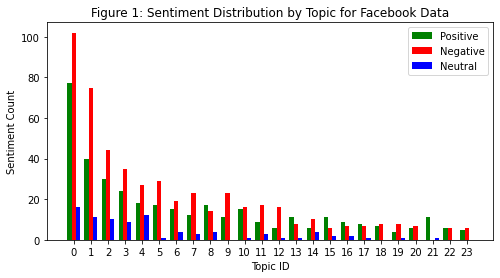

In [45]:
#GROUPED BAR CHART FOR FACEBOOK DATA
# Set the width of each bar
bar_width = 0.25

# Set the x positions of the bars
x_pos = np.arange(len(fb_final_output['Topic']))

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(x_pos - bar_width, fb_final_output['Count Positive'], width=bar_width, color='g', label='Positive')
ax.bar(x_pos, fb_final_output['Count Negative'], width=bar_width, color='r', label='Negative')
ax.bar(x_pos + bar_width, fb_final_output['Count Neutral'], width=bar_width, color='b', label='Neutral')

# Add labels and titles
ax.set_xlabel('Topic ID')
ax.set_ylabel('Sentiment Count')
ax.set_xticks(x_pos)
ax.set_xticklabels(fb_final_output['Topic'])
ax.set_title('Figure 1: Sentiment Distribution by Topic for Facebook Data')
ax.legend()



# Show the chart
plt.show()

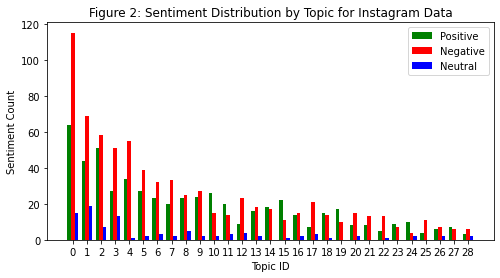

In [46]:
#GROUP BAR CHART INSTAGRAM DATA
# Set the width of each bar
bar_width = 0.25

# Set the x positions of the bars
x_pos = np.arange(len(insta_final_output['Topic']))

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(x_pos - bar_width, insta_final_output['Count Positive'], width=bar_width, color='g', label='Positive')
ax.bar(x_pos, insta_final_output['Count Negative'], width=bar_width, color='r', label='Negative')
ax.bar(x_pos + bar_width, insta_final_output['Count Neutral'], width=bar_width, color='b', label='Neutral')

# Add labels and titles
ax.set_xlabel('Topic ID')
ax.set_ylabel('Sentiment Count')
ax.set_xticks(x_pos)
ax.set_xticklabels(insta_final_output['Topic'])
ax.set_title('Figure 2: Sentiment Distribution by Topic for Instagram Data')
ax.legend()



# Show the chart
plt.show()